# What can Pandas do for you?

What is Pandas?

It is a Panda library for working with data sets. It provides many functions useful for __data analysis__, including for cleaning, manipulating, exploring and analyzing data

Makes analyzing large data sets more convenient and robust


In [221]:
# to use pandas we need to import the library

import numpy as np
import pandas as pd

pandas provides two basic types of data structures

A __Series__ is a __one-dimensional__ array holding data of any type

A __Dataframe__ a __two-dimensional__ structure that holds data in a table with rows and columns


In [222]:
# example of a Series

s = pd.Series([23,324,2,0,"ABC",-1230123,"DEF"])
print(s)

0          23
1         324
2           2
3           0
4         ABC
5    -1230123
6         DEF
dtype: object


In [223]:
# we can automatically index the series (with an index running from 0....len(data)-1) 
# or create our own index
s2 = pd.Series([23,324,2,0,"ABC",-1230123,"DEF"],index=["a","b","c","d","e","f","g"])

print(s[1])
print(s2["b"])

324
324


In [224]:
# the Series provides a number of useful functions

s3 = pd.Series(np.random.rand(100))
print(s3)
print(f'median for Series s3 is {s3.median():.3}')
print(f'average for Series s3 is {s3.mean():.3}')

0     0.635094
1     0.941060
2     0.646573
3     0.683590
4     0.003450
        ...   
95    0.417866
96    0.038952
97    0.490520
98    0.803587
99    0.385296
Length: 100, dtype: float64
median for Series s3 is 0.524
average for Series s3 is 0.512


In [225]:
# each series has a single data type (dtype)
print('Type of s is',s.dtype)
print('Type of s3 is', s3.dtype)

Type of s is object
Type of s3 is float64


In [226]:
# we can easily loop over the elements in the series
# we can use slicing like for arrays

sum = 0.0

#loop over the first 10 elements
for x in s3[:10]:
    print(x)
    sum += x
print(f'sum is {sum:.3}')

0.6350942702180267
0.9410601765976279
0.6465725605752566
0.6835898879106909
0.00344973081106692
0.6996644667552868
0.8718720498132525
0.7677542998368385
0.5904896803783956
0.1512210359072842
sum is 5.99


In [227]:
# example of data cleaning
# one useful check in making sure your data make sense is looking for "NaN" - Not a Number
# can happen is one accidentally divides by zero etc

# check if our series contains a 'NaN'

print(s3.hasnans)

False


In [228]:
# what happens is we add one?

s3[4] = None
print(s3.hasnans)

True


Text(0, 0.5, 'Entries per bin')

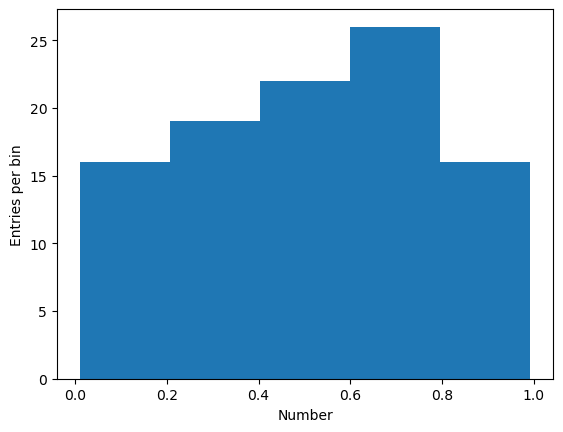

In [229]:
# we can plot the data in our series directly

ax = s3.plot.hist(bins=5)
ax.set_xlabel("Number")
ax.set_ylabel("Entries per bin")

Even more useful are the Pandas Dataframes

These are two dimensional tables holding your data and providing many powerful functions.
Some key features of a Pandas DataFrame:

* Data representation: Stores data in a table format with rows and columns.
* Heterogeneous data types: Can hold different data types in different columns (e.g., integers, floats, strings, booleans).
* Labeling: Each row and column has a label (index and column names).
* Mutable: Allows data manipulation and modification.
* Powerful operations: Provides various functions and methods for data analysis, manipulation, and exploration.
* Extensible: Can be customized and extended with additional functionalities through libraries and user-defined functions.


In [230]:
# let's look at a simple DataFrame

df = pd.DataFrame(
{
    "Name": ["Braund, Mr. Owen Harris", "Allen, Mr. William Henry","Bonnell, Miss. Elizabeth",],
    "Age": [22, 35, 58],
    "Sex": ["male", "male", "female"],
})

In [231]:
df

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22,male
1,"Allen, Mr. William Henry",35,male
2,"Bonnell, Miss. Elizabeth",58,female


In [232]:
# each column in the DataFrame is series

df["Age"]

0    22
1    35
2    58
Name: Age, dtype: int64

In [233]:
df["Age"].mean()

38.333333333333336

Let's look at some more interesting data. Use Pandas DataFrame to read in the Pendulum data file we used previously

In [234]:
pendulum = pd.read_csv("../Data/pendulumData.csv")

In [235]:
pendulum


,label,g (m/s2),stat uncert,sys uncert,total uncert
0,20.Sep.X.B01.01,9.830,0.0075,"""+0.35,-0.44""",NaN
1,20.Sep.X.B01.02,9.060,0.14,0.23,NaN
2,20.Sep.X.B01.03,9.790,0.02,0.02,NaN
3,20.Sep.X.B01.04,9.882,0.016,0.13,NaN
4,20.Sep.X.B01.05,978.000,17,8,NaN
...,...,...,...,...,...
348,24.Feb.A.B01.05,10.600,0.6,0.8,NaN
349,24.Feb.A.B02.01,9.500,NaN,NaN,0.7
350,24.Feb.A.B02.02,9.000,NaN,NaN,0.8
351,24.Feb.A.B02.03,9.900,NaN,NaN,0.4


Well, that was easy!

We can get the most interesting column and analyze it further

In [236]:
g = pendulum["g (m/s2)"]

In [237]:
print(f'Average value for g is {g.mean():.3} m/s^2')

Average value for g is 12.6 m/s^2


That's very high. Let's look at the data again.

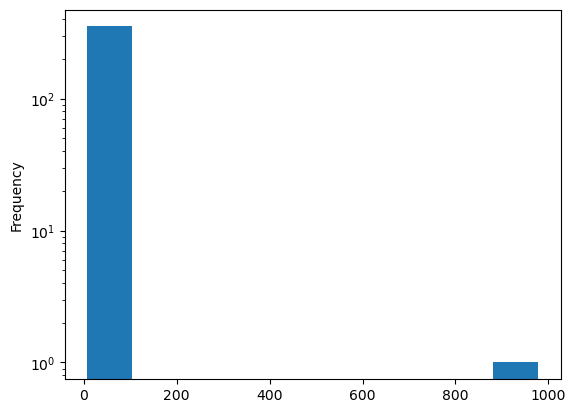

In [238]:
ax = g.plot.hist()
ax.set_yscale("log")

Ok, we see again that there was one value that was measured in cm/s^2 instead if m/s^2

We can get the index of this value and drop it from the series (we could also correct it by dividing it by 100)

In [239]:
print(f'Average value for g is {g.mean():.3} m/s^2')
print(f'Maximum value found in series is {g.max()}')

Average value for g is 12.6 m/s^2
Maximum value found in series is 978.0


In [240]:
# get the index for the maximum value
i = g.idxmax()
print(f'the index for the maximum value is {i}')

the index for the maximum value is 4


In [241]:
# we'll make a copy of the data and replace it with a corrected value
gc = g.copy()
gc[i] = g[i]/100.0
print(gc[i])

9.78


Maximum value found in series is 15.7
Average value for g is 9.83 m/s^2
Standard deviation for g is 0.702 m/s^2


Text(0.5, 0, 'observed value of g (m/s^2)')

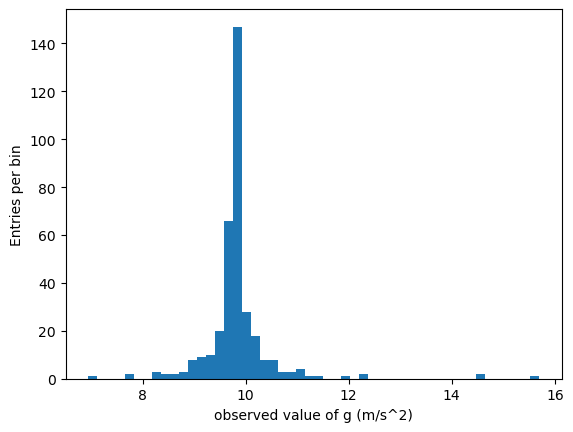

In [242]:

# now we get this distribution
print(f'Maximum value found in series is {gc.max()}')
print(f'Average value for g is {gc.mean():.3} m/s^2')
print(f'Standard deviation for g is {gc.std():.3} m/s^2')

# and the histogram looks different as well

ax = gc.plot.hist(bins=50)
ax.set_ylabel("Entries per bin")
ax.set_xlabel("observed value of g (m/s^2)")

In [243]:
# Let's go back to the DataFrame with all the data
print(pendulum)

               label  g (m/s2) stat uncert     sys uncert total uncert
0    20.Sep.X.B01.01     9.830      0.0075  "+0.35,-0.44"          NaN
1    20.Sep.X.B01.02     9.060        0.14           0.23          NaN
2    20.Sep.X.B01.03     9.790        0.02           0.02          NaN
3    20.Sep.X.B01.04     9.882       0.016           0.13          NaN
4    20.Sep.X.B01.05   978.000          17              8          NaN
..               ...       ...         ...            ...          ...
348  24.Feb.A.B01.05    10.600         0.6            0.8          NaN
349  24.Feb.A.B02.01     9.500         NaN            NaN          0.7
350  24.Feb.A.B02.02     9.000         NaN            NaN          0.8
351  24.Feb.A.B02.03     9.900         NaN            NaN          0.4
352  24.Feb.A.B02.04     9.230         NaN            NaN         1.08

[353 rows x 5 columns]


In [244]:
label = pendulum["label"]
print(label)

0      20.Sep.X.B01.01
1      20.Sep.X.B01.02
2      20.Sep.X.B01.03
3      20.Sep.X.B01.04
4      20.Sep.X.B01.05
            ...       
348    24.Feb.A.B01.05
349    24.Feb.A.B02.01
350    24.Feb.A.B02.02
351    24.Feb.A.B02.03
352    24.Feb.A.B02.04
Name: label, Length: 353, dtype: object


The best data should be in the rows with an "A" label after the date

Mean of 165 "A" values is 9.88, std dev is 0.947
Mean of 157 "B" values is 9.79, std dev is 0.378
Mean of 31 "X" values is 9.76, std dev is 0.323


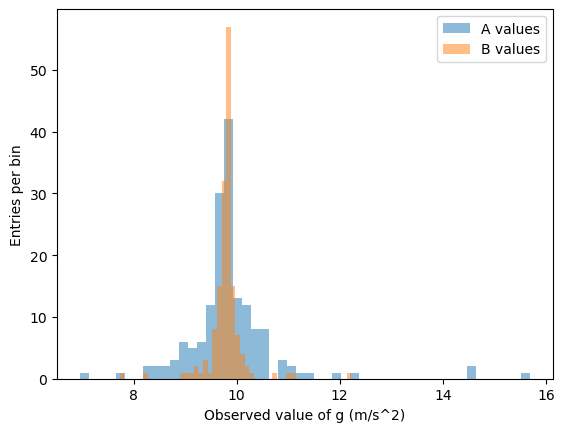

In [256]:
g1 = []
g2 = []
g3 = []

# split the data set in the different types of measurements, "A", "B", "X"
i = 0
for l in label:
    if(l[7] == "A"):
        g1.append(gc[i])
    elif(l[7] == "B"):
        g2.append(gc[i])
    else:
        g3.append(gc[i])
    i += 1
gA = pd.Series(g1)
print(f'Mean of {len(g1)} "A" values is {gA.mean():.3}, std dev is {gA.std():.3}')
gB = pd.Series(g2)
print(f'Mean of {len(g2)} "B" values is {gB.mean():.3}, std dev is {gB.std():.3}')
gX = pd.Series(g3)
print(f'Mean of {len(g3)} "X" values is {gX.mean():.3}, std dev is {gX.std():.3}')

ax = gA.plot.hist(bins=50,alpha=0.5, label = "A values")
gB.plot.hist(bins=50, alpha = 0.5, label = "B values" )
ax.set_xlabel("Observed value of g (m/s^2)")
ax.set_ylabel("Entries per bin")
ax.legend()